In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from PIL import Image
import matplotlib.pyplot as plt
from torchvision import transforms, models
import numpy as np

In [2]:
device = 'cuda'

In [3]:
def load_images(img_path):
    
    image = Image.open(img_path)
    transform = transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.ToTensor(),
        transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
    ])
    return transform(image).unsqueeze(0).to(device)

In [4]:
content_img = load_images('images/Animal.jpg')
style_img = load_images('images/Starry-Night.jpg')

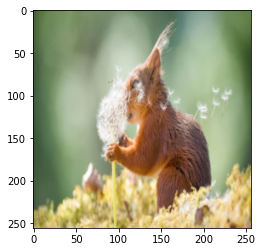

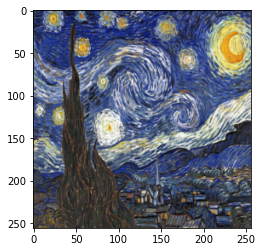

In [5]:
def show_images(img):
    image = img.cpu().clone() # clone so that we do not carry out changes on it
    image = image.detach().numpy().squeeze(0) # remove fake dimension
    image = image.transpose(1,2,0)
    image = image * np.array((0.229, 0.224, 0.225)) + np.array((0.485, 0.456, 0.406))
    image = image.clip(0, 1)
    plt.imshow(image)
    plt.show()
    
show_images(content_img)
show_images(style_img)

In [6]:
# Pytorch implementation of vgg has 2 modules; features which have convolution and pooling layers and classifier which has fully connected layers
# features module is used to make use of individual convolution layer output to measure losses

vgg = models.vgg19(pretrained = True).features.to(device)

for param in vgg.parameters():
    param.requires_grad_(False)

In [7]:
vgg._modules.items()

odict_items([('0', Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))), ('1', ReLU(inplace=True)), ('2', Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))), ('3', ReLU(inplace=True)), ('4', MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)), ('5', Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))), ('6', ReLU(inplace=True)), ('7', Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))), ('8', ReLU(inplace=True)), ('9', MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)), ('10', Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))), ('11', ReLU(inplace=True)), ('12', Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))), ('13', ReLU(inplace=True)), ('14', Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))), ('15', ReLU(inplace=True)), ('16', Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))), ('17', ReLU(inplace=Tru

In [8]:
def gram_matrix(input):
    a, b, c, d = input.size()
    features = input.view(a*b, c*d)
    G = torch.mm(features, features.t())
    return G.div(a*b*c*d) # normalize gram matrix values by dividing by the number of elements in each feature map

In [9]:
def create_features(image, vgg, layers):
    
    features = {}
    feature = image
    for name, layer in vgg._modules.items():
        if isinstance(layer, nn.ReLU):
            layer = nn.ReLU(inplace = False)
        feature = layer(feature)
        if name in layers :
            features[name] = feature
    return features
        

In [10]:
style_features = create_features(style_img, vgg, ['0', '5', '10', '19', '21', '28'])
content_features = create_features(content_img, vgg, ['21'])
input_img = content_img.clone().requires_grad_(True).to(device)
opt = torch.optim.Adam([input_img])

In [11]:
input_img.size()
style_img.size()

torch.Size([1, 3, 256, 256])

In [12]:
style_weights = {'0': 1.,
                 '5': 1.,
                 '10': 1.,
                 '19': 0.5,
                 '28': 0.5}

style_weight = 1e10  
torch.autograd.set_detect_anomaly(True)

Steps : 200 Loss : 120596736.0


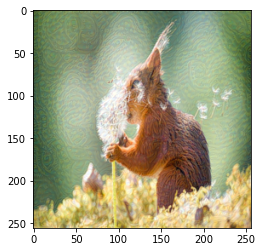

Steps : 400 Loss : 41473444.0


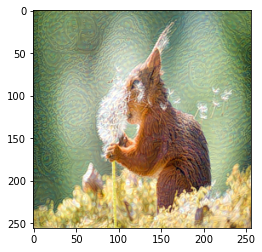

Steps : 600 Loss : 24998908.0


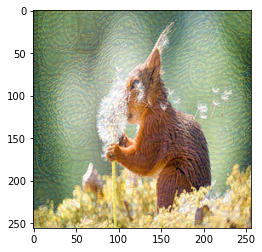

Steps : 800 Loss : 18283156.0


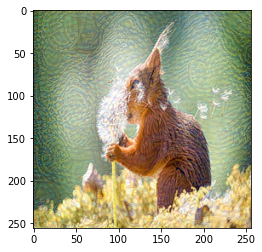

Steps : 1000 Loss : 14204824.0


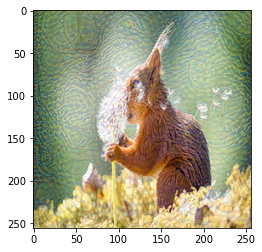

Steps : 1200 Loss : 11448752.0


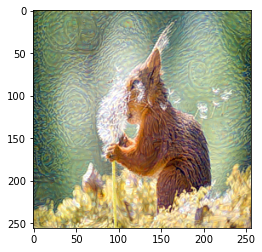

Steps : 1400 Loss : 9457879.0


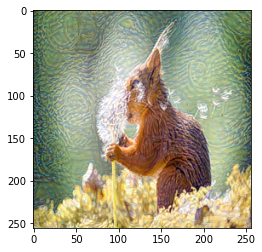

Steps : 1600 Loss : 7949594.0


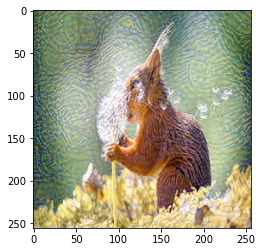

Steps : 1800 Loss : 6763472.0


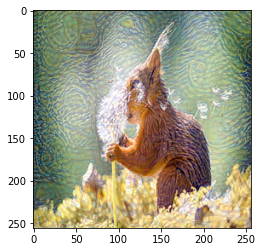

Steps : 2000 Loss : 5807135.5


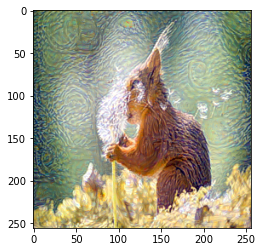

Steps : 2200 Loss : 5019942.0


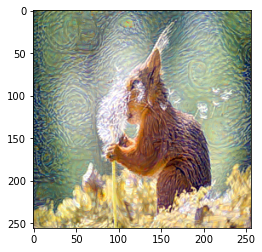

Steps : 2400 Loss : 4362648.0


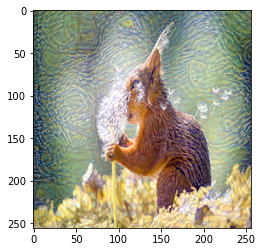

Steps : 2600 Loss : 3810800.0


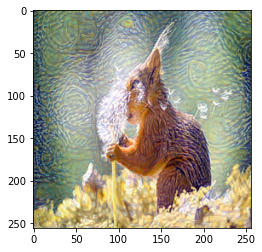

Steps : 2800 Loss : 3344676.75


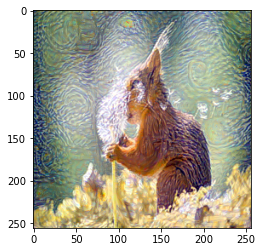

Steps : 3000 Loss : 2947479.25


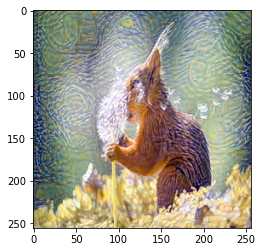

Steps : 3200 Loss : 2608797.5


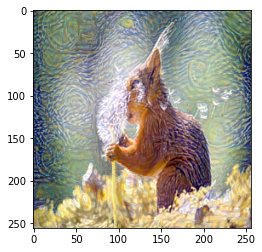

Steps : 3400 Loss : 2320792.0


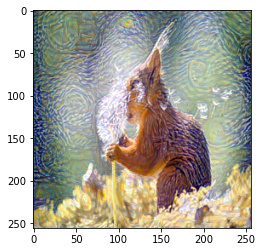

Steps : 3600 Loss : 2077027.375


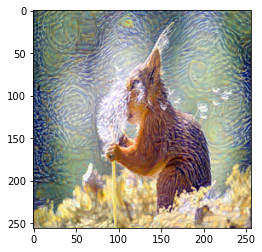

Steps : 3800 Loss : 1868007.875


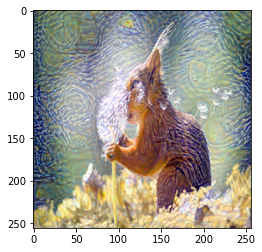

Steps : 4000 Loss : 1688208.0


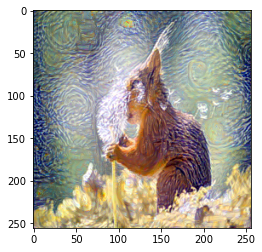

Steps : 4200 Loss : 1532824.5


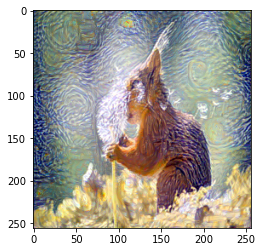

Steps : 4400 Loss : 1397337.875


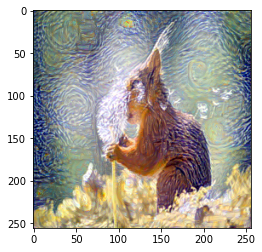

Steps : 4600 Loss : 1279713.25


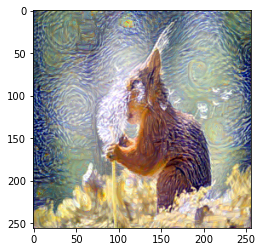

Steps : 4800 Loss : 1176700.0


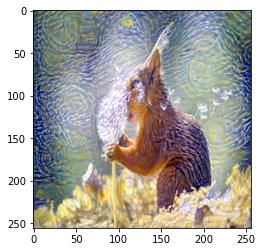

Steps : 5000 Loss : 1086223.375


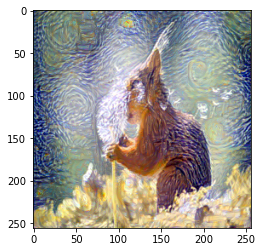

Steps : 5200 Loss : 1006272.6875


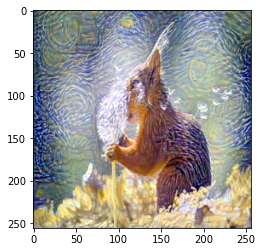

Steps : 5400 Loss : 934809.4375


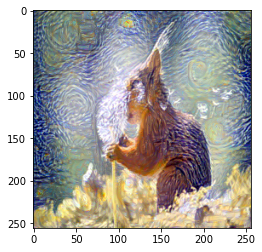

Steps : 5600 Loss : 871076.5625


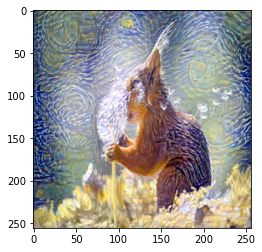

Steps : 5800 Loss : 813667.0


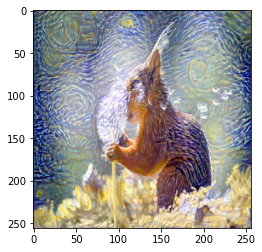

Steps : 6000 Loss : 761968.25


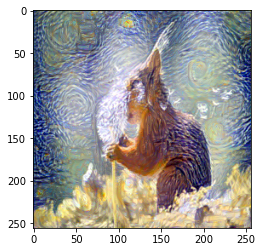

Steps : 6200 Loss : 715361.3125


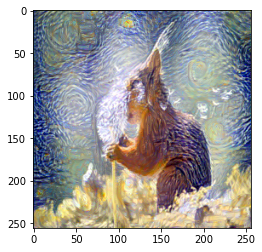

Steps : 6400 Loss : 672720.3125


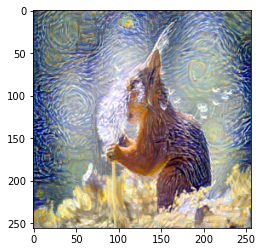

Steps : 6600 Loss : 633737.1875


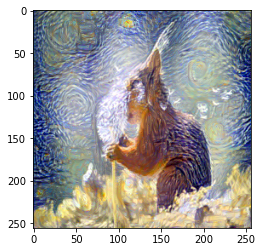

Steps : 6800 Loss : 598349.625


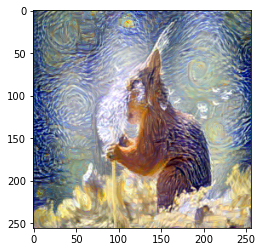

Steps : 7000 Loss : 566077.75


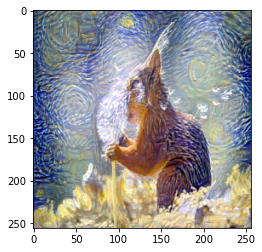

Steps : 7200 Loss : 536297.625


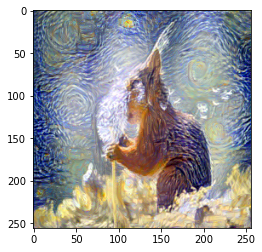

Steps : 7400 Loss : 508610.75


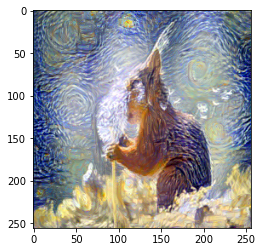

Steps : 7600 Loss : 482966.25


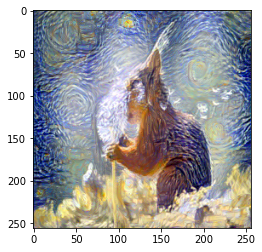

Steps : 7800 Loss : 459172.1875


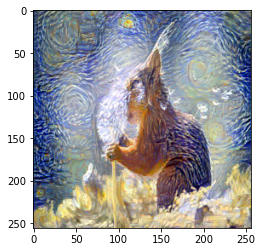

Steps : 8000 Loss : 437015.9375


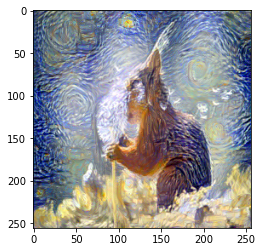

Steps : 8200 Loss : 416249.71875


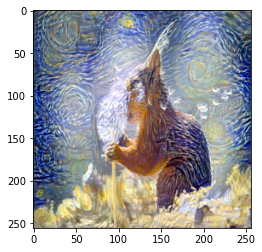

Steps : 8400 Loss : 396818.40625


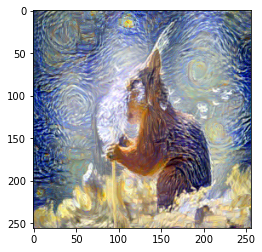

Steps : 8600 Loss : 378793.1875


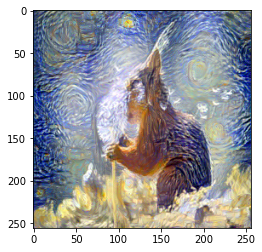

Steps : 8800 Loss : 361981.90625


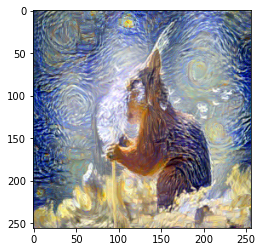

Steps : 9000 Loss : 346313.75


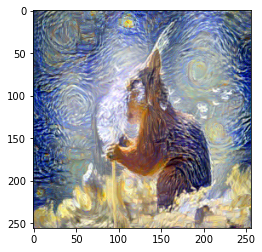

Steps : 9200 Loss : 331649.5625


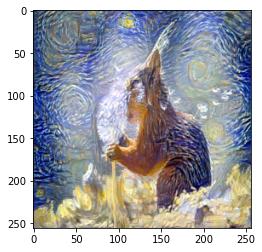

Steps : 9400 Loss : 317911.09375


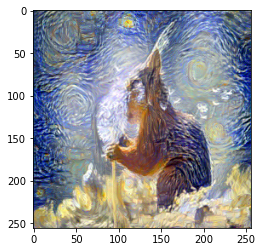

Steps : 9600 Loss : 305047.875


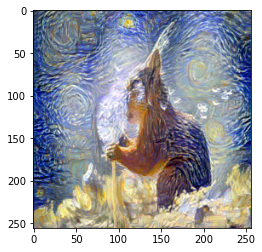

Steps : 9800 Loss : 293105.71875


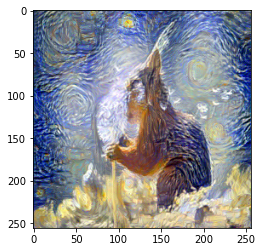

Steps : 10000 Loss : 281790.78125


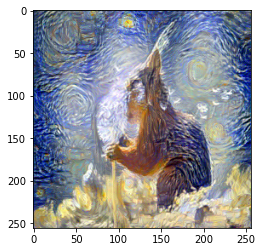

In [13]:
content_loss = 0
steps = 200

for i in range(1, 10001):
    
    input_img_features = create_features(input_img, vgg, ['0', '5', '10', '19', '21', '28'])
    
    style_loss = 0
    for layer in ['0', '5', '10', '19', '28'] :
        input_feature = input_img_features[layer]
        input_gram_matrix = gram_matrix(input_feature)
        style_gram_matrix = gram_matrix(style_features[layer])
        layerl_style_loss = style_weights[layer]*torch.mean((input_gram_matrix - style_gram_matrix)**2)
        style_loss += layerl_style_loss
        
    content_loss = torch.mean((input_img_features['21'] - content_features['21'])**2)
    total_loss = content_loss + style_weight*style_loss
    opt.zero_grad()
    total_loss.backward(retain_graph = True)
    opt.step()

    if i % steps ==0 and i > 0 :
        print('Steps :', i, 'Loss :', total_loss.item())
        show_images(input_img)